# Context :

## Mental Arithmetic EEG Dataset (36 subjects)

**Source Kaggle + PhysioNet (BIDS format)**

Objectif du dataset
Étudier les modifications de l’activité cérébrale (via EEG) lors de tâches cognitives impliquant une charge mentale élevée (séries de soustractions mentales). Ce dataset est utile pour :

- **la détection de stress cognitif**
- **la classification d'état mental (repos vs activité mentale)**
- les modèles de charge mentale ou de BCI (interfaces cerveau-machine)
- **la génération de connectomes EEG (cohérence, wPLI, etc.)**

## Méthode expérimentale
| Élément                     | Détail                                                                 |
|----------------------------|------------------------------------------------------------------------|
| Nombre de sujets            | 36 (étudiants en biologie / psychologie, âge moyen : 18,6 ans)         |
| Périodes enregistrées       | 3 minutes de repos + 1 minute d’activité mentale                       |
| Tâche cognitive             | Soustraction mentale de 2 nombres (ex : 3141 - 42)                     |
| Environnement               | Chambre sombre insonorisée, yeux fermés pendant l’enregistrement       |
| Position des électrodes     | Norme internationale 10/20  --> positions (Fp1, Fp2, F3, F4, F7, F8, T3, T4, ..., Pz) – 19 canaux au total |
| Matériel EEG                | Neurocom 23-channel system (XAI-MEDICA, Ukraine)                       |
| Fréquence d’échantillonnage | 500 Hz                                                                 |
| Filtrage                    | 0.5–45 Hz + notch 50 Hz + ICA (=Analyse en Composantes Indépendantes -> pour retirer les artéfacts)             |


# Description des fichiers (sur Kaggle)
On dispose de 36 fichiers .csv, chacun correspondant à un sujet, avec :

- Colonnes : 19 canaux EEG standards (Fp1, Fp2, F3, ..., Pz)
- Lignes : ~30 000 points (soit 60 secondes à 500 Hz)


# Groupes de performance mentale
Les 36 sujets sont classés en deux groupes :

- G (Good counters, 24 sujets) : moyenne ≈ 21 opérations
- B (Bad counters, 12 sujets) : moyenne ≈ 7 opérations

Ce classement se trouve dans un fichier participants.tsv dans la version BIDS (PhysioNet), mais il n’est pas présent dans la version Kaggle. Il faudra l’ajouter à la main si nécessaire pour une tâche de classification supervisée.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Lecture du dataset

In [8]:
csv_path = "../data/dataset/MATH_EEG/s00.csv"

columns = [
    "Fp1", "Fp2", "F3", "F4", "F7", "F8", "T3", "T4",
    "C3", "C4", "T5", "T6", "P3", "P4", "O1", "O2",
    "Fz", "Cz", "Pz"
]

df = pd.read_csv(csv_path, names=columns)

df.head()


,Fp1,Fp2,F3,F4,F7,F8,T3,T4,C3,C4,T5,T6,P3,P4,O1,O2,Fz,Cz,Pz
0,4.4760,-2.7403,-2.5017,0.095121,-7.0917,-0.42704,-2.5918,-3.3238,0.999500,0.87011,-0.080058,2.8075,-0.52398,1.93410,-3.7614,-1.1440,0.033687,2.7164,0.84831
1,1.2080,-3.3088,-4.4178,-0.529350,-8.5782,0.40699,-3.0996,-3.6005,-0.048363,-0.17258,-0.129650,3.2872,-1.06670,1.53570,-5.1933,-2.2263,-0.682180,4.8287,0.45261
2,-2.5460,-3.7083,-6.4109,-1.003300,-10.2200,1.87700,-3.6952,-3.8673,-1.132300,-1.32850,-0.094006,3.9756,-1.67430,1.12850,-6.5565,-3.0953,-1.284400,6.6513,-0.10393
3,-6.1871,-3.6804,-8.0297,-1.103100,-11.7210,4.01570,-4.2652,-4.0530,-1.984100,-2.36070,0.076473,4.8331,-2.22930,0.79364,-7.4787,-3.4209,-1.540900,7.6371,-0.74250
4,-9.1110,-3.0027,-8.8444,-0.651400,-12.7840,6.71770,-4.6708,-4.0965,-2.337200,-3.02550,0.401930,5.7805,-2.61450,0.58741,-7.6430,-2.9829,-1.248700,7.4512,-1.32640


# On trace les signaux

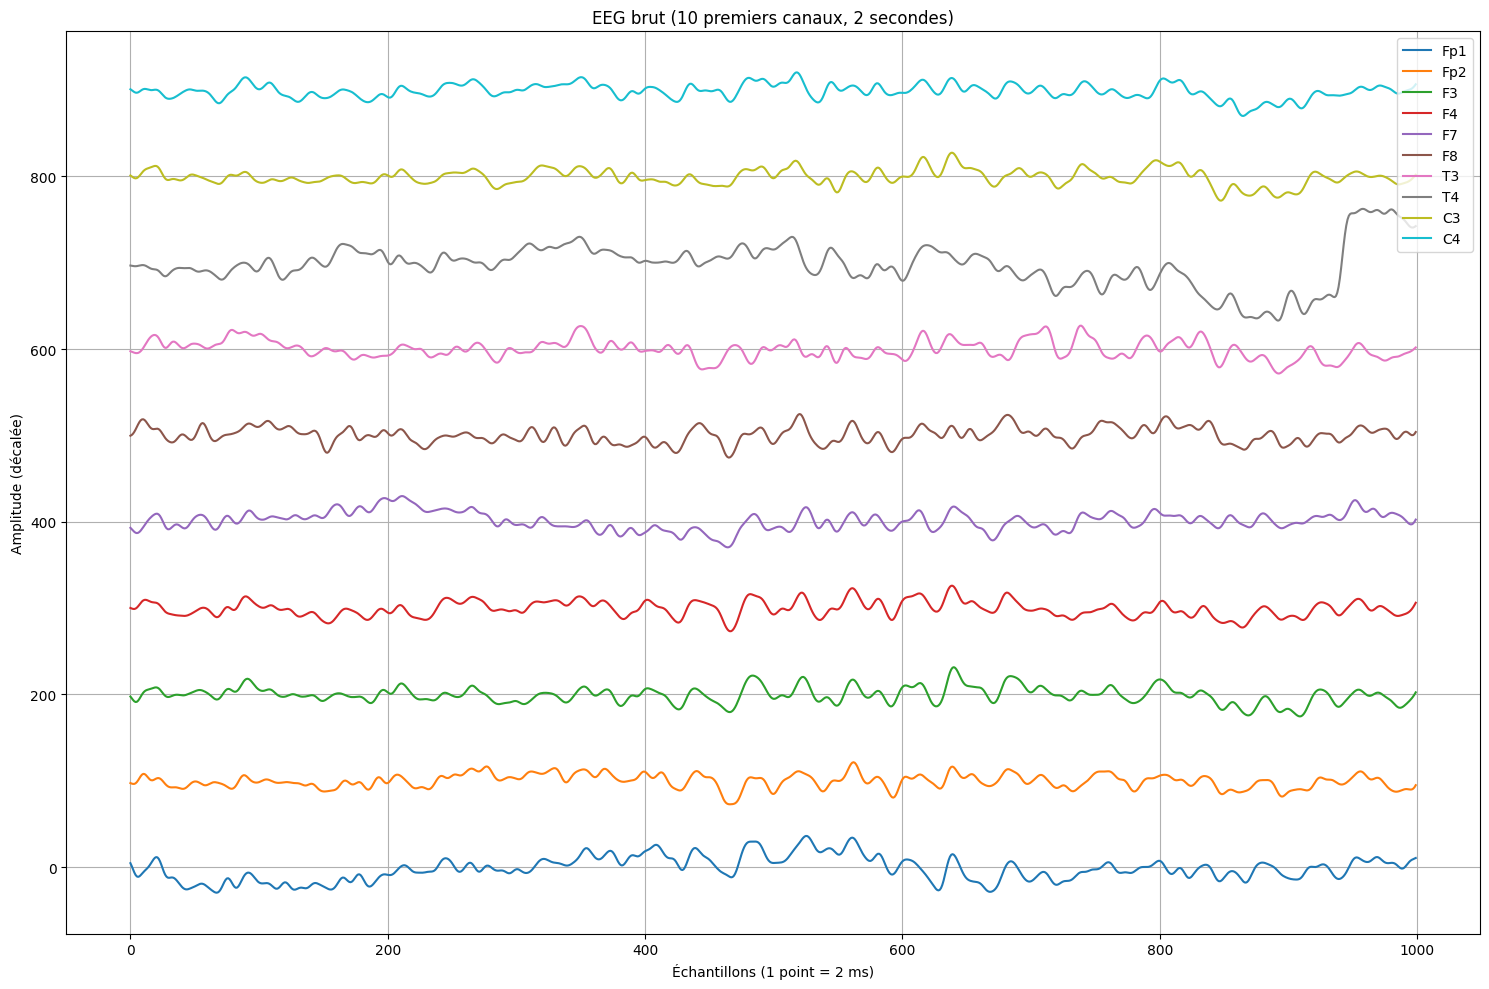

In [15]:
# Paramètres d'affichage
n_seconds = 2
sampling_rate = 500
n_points = n_seconds * sampling_rate

plt.figure(figsize=(15, 10))

# Afficher les 10 premiers canaux
for i, column in enumerate(df.columns[:10]):
    signal = df[column][:n_points]
    plt.plot(signal + i * 100, label=column)  # Décalage vertical pour lisibilité

plt.title("EEG brut (10 premiers canaux, 2 secondes)")
plt.xlabel("Échantillons (1 point = 2 ms)")
plt.ylabel("Amplitude (décalée)")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


# Visualization d'un canal individuel

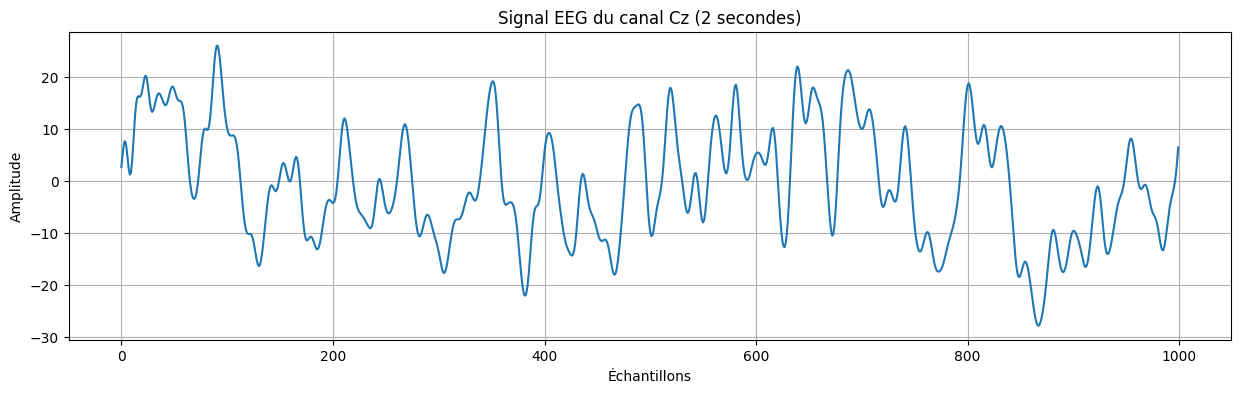

In [ ]:
channel = "Cz"  
signal = df[channel]

plt.figure(figsize=(15, 4))
plt.plot(signal[:1000])
plt.title(f"Signal EEG du canal {channel} (2 secondes)")
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
